In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

# normal stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mesa_reader as mr
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.patches as patches
from matplotlib import cm

import read_mist_models

#import seaborn as sns
#plt.style.use('seaborn-white')

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 16



# Finally set up the plotting to look a little nicer.
plt.rcParams["savefig.dpi"] = 100
plt.rcParams["figure.dpi"] = 100

def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def logerr(t,dt):
    err1 = np.abs(np.log10((t-dt/2.0)/t))
    err2 = np.abs(np.log10((t+dt/2.0)/t))
    err = [[err1],[err2]]
    return err

BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

DodgerBlue1 = (0.12, 0.56, 1.00)
DodgerBlue2 = (0.11, 0.53, 0.93)
DodgerBlue3 = (0.09, 0.45, 0.80)



COLORS=[ORANGE,SKY_BLUE,BLUE_GREEN,BLUE,RED_PURPLE,BLUE_GREEN,VERMILLION,DodgerBlue1,BLACK]

StarDeepT=7130
StarDeepL=4.3e5
StarMidT=11684
StarMidL=1.256e6
StarTopT=47564
StarTopL=8.96e5


sigmaori =(4.43,5.44)
kappaori =(4.42,5.35)
kcas = (4.33,5.52) # Crowther et al 2006, A&A 446, 279–293 (2006)

starhot = (4.223,5.841) 
starcool = (3.921,5.841)

R71 = (4.19,5.78)

LBVhot = (4.279,6.4) 
LBVcool = (3.954,6.2)
LBVhotl = (4.279,6.0)



In [3]:
mods=['10','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','95','100']
labels=['20','','30','','40','','50','','60','','70','','80','','90','','100']
rsun=6.67e10
ii=0
X=[]
Y=[]
Z=[]
ZLtot = []
ZLrad = []
zamsL = []
zamsT = []
for models in mods:
    chosen_model=models+'/LOGS/'
    h = mr.MesaData(chosen_model+'history.data')
    #h=ms.history_data(chosen_model,slname='history.data')
    Ltot_div_Ledd_max=h.Ltot_div_Ledd_max
    Lrad_div_Ledd_max=h.Lrad_div_Ledd_max
    hr=h.hp_div_R_Fe*rsun
    hrhe=h.hp_div_R_He
    logl=h.log_L
    logt=h.log_Teff
    loglh=h.log_LH
    h1=h.center_h1
    #surface_opacity=h.surf_avg_opacity
    model = h.model_number
    tams=find_h1(h1,model,0.001)
    zams=find_zams(logl,loglh,model) #Clean the PMS
    teff=10**logt[zams:]
    model=model[zams:]
    i_profile=find_teff(teff,model,StarTopT)
    X.extend(logt[zams:])
    Y.extend(logl[zams:])
    Z.extend(hr[zams:])
    ZLtot.extend(Ltot_div_Ledd_max[zams:])
    ZLrad.extend(Lrad_div_Ledd_max[zams:])
    zamsL.append(logl[zams])
    zamsT.append(logt[zams])
    ii=ii+1
    

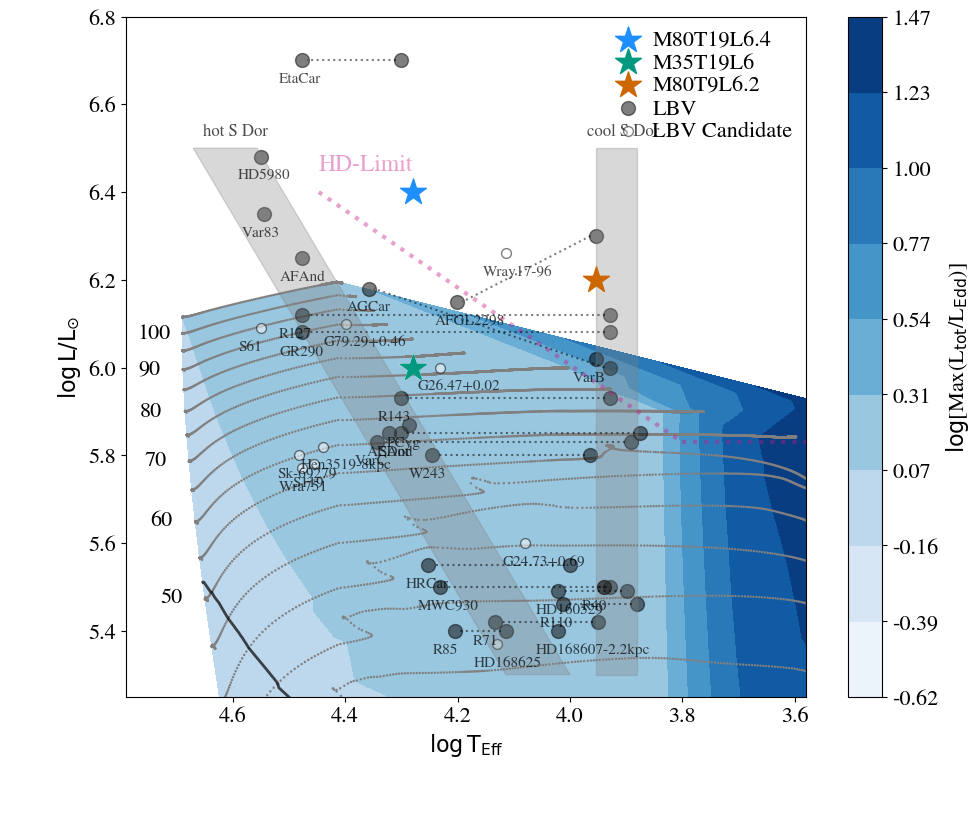

In [4]:
size = 400
size_lbv = 100
size_lbvc = 50
hot=plt.cm.hot
blues=plt.cm.Blues
purples=plt.cm.Purples
terrain = plt.cm.get_cmap(name='terrain', lut=None)
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])
numconts = 10

levels = np.linspace(np.min(np.log10(ZLtot)), np.max(np.log10(ZLtot)), num=numconts)
CS=ax.tricontourf(X, Y, np.log10(ZLtot), levels, cmap=blues)

Extra = ax.tricontour(X, Y,  np.log10(ZLtot), levels=[0],colors='black',linewidths=2.0,alpha=0.7)
ax.annotate(r'L = L$_{\rm Edd}$',xy=(4.2,4.85),alpha=0.7,rotation=-20)

ax.scatter(X,Y,color='Grey',edgecolors='none',s=3)
cbar = plt.colorbar(CS,format='%.2f')
cbar.ax.set_ylabel(r'$\log$[Max(L$_{\rm tot}$/L$_{\rm Edd}$)]')
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")

#plt.xlim([4.79,3.58])
#plt.ylim([5.00,6.6])

plt.ylim([5.25,6.8])
plt.xlim([4.79,3.58])



ii=0
for models in labels:
    ax.annotate(models,xy=(zamsT[ii]+0.08,zamsL[ii]-0.01))
    ii=ii+1
    


hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='mediumvioletred' # 'palevioletred'

plt.plot(hdx, hdy, ':',linewidth=3,color=clr,alpha=0.4,zorder=1)

ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=0.4)

hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]

plt.plot(hdx, hdy, ':',linewidth=3,color=clr,alpha=0.4,zorder=1)


plt.scatter(LBVhot[0],LBVhot[1],color='white',s=size,marker='*')
plt.scatter(LBVhot[0],LBVhot[1],color=DodgerBlue1,s=size-20,marker='*',label=r'M80T19L6.4')
plt.scatter(LBVhotl[0],LBVhotl[1],color='white',s=size,marker='*')
plt.scatter(LBVhotl[0],LBVhotl[1],color=BLUE_GREEN,s=size-20,marker='*',label=r'M35T19L6',zorder=2)
plt.scatter(LBVcool[0],LBVcool[1],color='white',s=size,marker='*')
plt.scatter(LBVcool[0],LBVcool[1],color=VERMILLION,s=size-20,marker='*',label=r'M80T9L6.2',zorder=2)

# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]
# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('hot S Dor',xy=(np.log10(x[0])+0.05,y[0]+0.03),alpha=0.7,size=12)
x = [8500,8500]
y = [6.5,5.2]
ax.annotate('cool S Dor',xy=(np.log10(x[0])+0.04,y[0]+0.03),alpha=0.7,size=12)


# ADD DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     ('AGCar',[22800,8500],[6.18,6.0]),
     ('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
     ('HRCar',[17900,10000],[5.55,5.55]),
     ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]),
     ('HD160529',[10500,7900],[5.49,5.49]),
     ('VarC',[22000,7800],[5.83,5.83]),
     ('R127',[30000,8500],[6.12,6.12]),
     ('SDor',[20000,7500],[5.85,5.85]),
     ('R71',[13600,8900],[5.42,5.42]),
     ('R110',[10300,7600],[5.46,5.46]),
     ('R143',[20000,8500],[5.93,5.93]),
     ('R40',[8700,8700],[5.5,5.5]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('GR290',[30000,8500],[6.08,6.08]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('AFGL2298',[15850,9000],[6.15,6.3]))

LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('PCyg',19300,5.87),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('VarB',9000,6.02),
      ('HD5980',35500,6.48)) 

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))

#  LBV New Distances
#('HD168607-1.2kpc',10500,5.4-0.52),
#('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
#('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67])

# LBVC New Distances



deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
for i in range(0, len(LBV2)): 
    plt.scatter(np.log10(LBV2[i][1]),LBV2[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV2[i][0],xy=(np.log10(LBV2[i][1])+deltax,LBV2[i][2]-deltay),alpha=0.7,size=11)
    
for i in range(0, len(LBVC)): 
    if i==0:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5,label='LBV Candidate')
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
    else:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5)
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")

label=plt.legend(loc=1,fontsize=16,scatterpoints=1)



#FILENAME = "LBV_plot.pdf"
#plt.savefig(FILENAME)

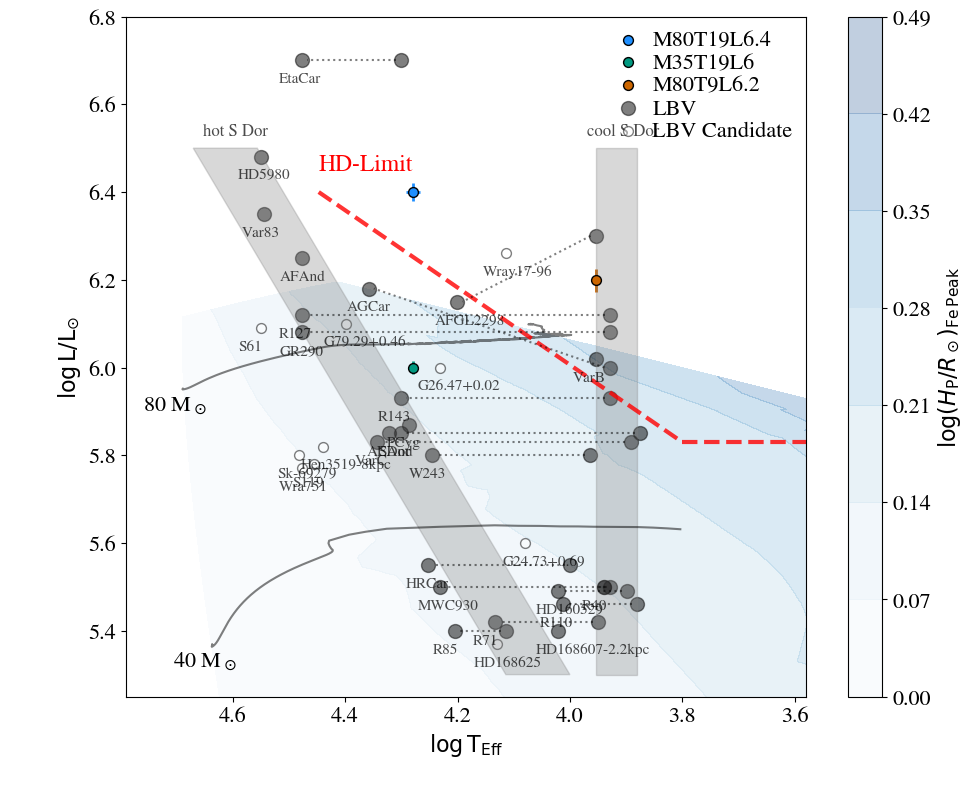

In [5]:
size = 100
size_lbv = 100
size_lbvc = 50

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])

plt.ylim([5.25,6.8])
plt.xlim([4.79,3.58])

# ADD LEVELS FOR HP

label=plt.legend(loc=1,fontsize=16,scatterpoints=1)
hot=plt.cm.hot
blues=plt.cm.Blues
purples=plt.cm.Purples
terrain = plt.cm.get_cmap(name='hot', lut=None)
numconts = 8

levels = np.linspace(np.min(Z), np.max(Z), num=numconts)
CS=ax.tricontourf(X, Y, Z, levels, cmap=blues,alpha=0.25)

#Extra = ax.tricontour(X, Y,  np.log10(Z), levels=[0],colors='black',linewidths=2.0,alpha=0.2)
#ax.annotate(r'L = L$_{\rm Edd}$',xy=(4.2,4.85),alpha=0.7,rotation=-20)
#ax.scatter(X,Y,color='Grey',edgecolors='none',s=3)
cbar = plt.colorbar(CS,format='%.2f')
cbar.ax.set_ylabel(r'$\log (H_{\rm P}/R_\odot)_{\rm Fe \, Peak}$')

# HD LIMIT 

hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='RED' # 'palevioletred'

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=2)

ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=1.0)

hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=1)


plt.scatter(LBVhot[0],LBVhot[1],color=DodgerBlue1,s=size-50,marker='o',label=r'M80T19L6.4',zorder=2,edgecolors='BLACK')
plt.scatter(LBVhotl[0],LBVhotl[1],color=BLUE_GREEN,s=size-50,marker='o',label=r'M35T19L6',zorder=2,edgecolors='BLACK')
plt.scatter(LBVcool[0],LBVcool[1],color=VERMILLION,s=size-50,marker='o',label=r'M80T9L6.2',zorder=2,edgecolors='BLACK')


# ADDING STANDARD DEVIATION OF L AND TEFF FROM THE ATHENA CALCULATIONS

MODEL = ['M80T9L6.2','M80T19L6.4','M35T19L6']
DELTAL = [0.12,0.0597,0.0704]  # In % (Standard deviation. CHECK HOW TO TRANSLATE THIS TO XERR - YERR!!)
DELTAT = [0.0175,0.0272,0.0183] 

DELTAL = [0.12*10**LBVcool[1],0.0597*10**LBVhot[1],0.0704*10**LBVhotl[1]]  # In abs values of T and L
DELTAT = [0.0175*10**LBVcool[0],0.0272*10**LBVhot[0],0.0183*10**LBVhotl[0]] 


T_err=logerr(10**LBVcool[0],DELTAT[0])
L_err=logerr(10**LBVcool[1],DELTAL[0])
plt.errorbar(LBVcool[0],LBVcool[1],xerr=T_err,yerr=L_err,color=VERMILLION,zorder=1,linewidth=2)

T_err=logerr(10**LBVcool[0],DELTAT[1])
L_err=logerr(10**LBVcool[1],DELTAL[1])
plt.errorbar(LBVhot[0],LBVhot[1],xerr=T_err,yerr=L_err,color=DodgerBlue1,zorder=1,linewidth=2)


T_err=logerr(10**LBVhotl[0],DELTAT[2])
L_err=logerr(10**LBVhotl[1],DELTAL[2])
plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=T_err,yerr=L_err,color=BLUE_GREEN,zorder=1,linewidth=2)


#print(10**LBVcool[0],DELTAT[0],10**LBVcool[1],DELTAL[0])
#print(T_err,L_err)

#plt.errorbar(LBVhot[0],LBVhot[1],xerr=0.5*LBVhot[0]*DELTAT[1],yerr=0.5*LBVhot[1]*DELTAL[1],color=DodgerBlue1,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=0.5*LBVhotl[0]*DELTAT[2],yerr=0.5*LBVhotl[1]*DELTAL[2],color=BLUE_GREEN,zorder=1,linewidth=2,capsize=5)

#plt.errorbar(LBVcool[0],LBVcool[1],xerr=[[0.1],[0.2]],color=VERMILLION,zorder=1,linewidth=2,capsize=5)


#plt.errorbar(LBVhot[0],LBVhot[1],xerr=np.log10(0.5*((10**LBVhot[0])*DELTAT[1])),yerr=np.log10(0.5*((10**LBVhot[1])*DELTAL[1])),color=DodgerBlue1,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=np.log10(0.5*((10**LBVhotl[0])*DELTAT[2])),yerr=np.log10(0.5*((10**LBVhotl[1])*DELTAL[2])),color=BLUE_GREEN,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVcool[0],LBVcool[1],xerr=np.log10(0.5*((10**LBVcool[0])*DELTAT[0])),yerr=np.log10(0.5*((10**LBVcool[1])*DELTAL[0])),color=VERMILLION,zorder=1,linewidth=2,capsize=5)

#print(0.5*LBVhot[0]*DELTAT[1])

#TT=10**LBVhot[0]
#dt=(10**LBVhot[0])*DELTAT[1]/2.0
#logdt=np.log10(TT+dt/TT)
#logTTplusdt=np.log10(TT+dt)
#print(TT,dt,logTTplusdt,logdt,logTTplusdt-LBVhot[0])

#A=(10**LBVhot[0])*DELTAT[1]
#print(10**LBVhot[0]+A/2)
#print(np.log10(10**LBVhot[0]+A/2)-LBVhot[0])
#print(0.5*LBVhot[0]*DELTAT[1])



# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('hot S Dor',xy=(np.log10(x[0])+0.05,y[0]+0.03),alpha=0.7,size=12)
x = [8500,8500]
y = [6.5,5.2]
ax.annotate('cool S Dor',xy=(np.log10(x[0])+0.04,y[0]+0.03),alpha=0.7,size=12)



# ADDING STELLAR EVOLUTIONARY TRACKS FROM JIANG ET AL. 2015

zamsL=[]
zamsT=[]


mods=['40deep','80top']#,'80top']
labels=['40','80']#,'80']
for models in mods:
    chosen_model='./'+models+'/'
    h = mr.MesaData(chosen_model+'history.data')
    model = h.model_number
    logl=h.log_L
    logt=h.log_Teff
   # hr=h.hp_div_R_Fe*rsun
    zams=find_zams(logl,loglh,model)
    zamsL.append(logl[zams])
    zamsT.append(logt[zams])
    n=len(logt)
    plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3],linewidth=1.5,linestyle='-',color=BLACK,alpha=0.5,zorder=1)#,label='StarTop')   # HRD

ii=0
for models in labels:
    ax.annotate(models+' M$_\odot$',xy=(zamsT[ii]+0.07,zamsL[ii]-0.05))
    ii=ii+1
    
#plt.scatter(np.log10(StarTopT),np.log10(StarTopL),color=SKY_BLUE,s=150,marker='s',label='StarTop',zorder=3,edgecolor='BLACK')
#plt.scatter(np.log10(StarMidT),np.log10(StarMidL),color=BLUE_GREEN,s=150,marker='s',label='StarMid',zorder=3,edgecolor='BLACK')
#plt.scatter(np.log10(StarDeepT),np.log10(StarDeepL),color=ORANGE,s=150,marker='s',label='StarDeep',zorder=3,edgecolor='BLACK')#,alpha=0.1)


# ADD DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     ('AGCar',[22800,8500],[6.18,6.0]),
     ('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
     ('HRCar',[17900,10000],[5.55,5.55]),
     ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]),
     ('HD160529',[10500,7900],[5.49,5.49]),
     ('VarC',[22000,7800],[5.83,5.83]),
     ('R127',[30000,8500],[6.12,6.12]),
     ('SDor',[20000,7500],[5.85,5.85]),
     ('R71',[13600,8900],[5.42,5.42]),
     ('R110',[10300,7600],[5.46,5.46]),
     ('R143',[20000,8500],[5.93,5.93]),
     ('R40',[8700,8700],[5.5,5.5]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('GR290',[30000,8500],[6.08,6.08]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('AFGL2298',[15850,9000],[6.15,6.3]))

LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('PCyg',19300,5.87),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('VarB',9000,6.02),
      ('HD5980',35500,6.48)) 

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))

#  LBV New Distances
#('HD168607-1.2kpc',10500,5.4-0.52),
#('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
#('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67])

# LBVC New Distances



deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
for i in range(0, len(LBV2)): 
    plt.scatter(np.log10(LBV2[i][1]),LBV2[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV2[i][0],xy=(np.log10(LBV2[i][1])+deltax,LBV2[i][2]-deltay),alpha=0.7,size=11)
    
for i in range(0, len(LBVC)): 
    if i==0:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5,label='LBV Candidate')
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
    else:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5)
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")


label=plt.legend(loc=1,fontsize=16,scatterpoints=1)




#FILENAME = "LBV_plot.pdf"
#plt.savefig(FILENAME)


[[0.026872146400301312], [0.025305865264770262]]
[[0.021047965680136869], [0.020074861263740303]]
[[0.015562705203923914], [0.015024263324625123]]
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/03000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/04000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/05000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/06000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/06500M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/07000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvc

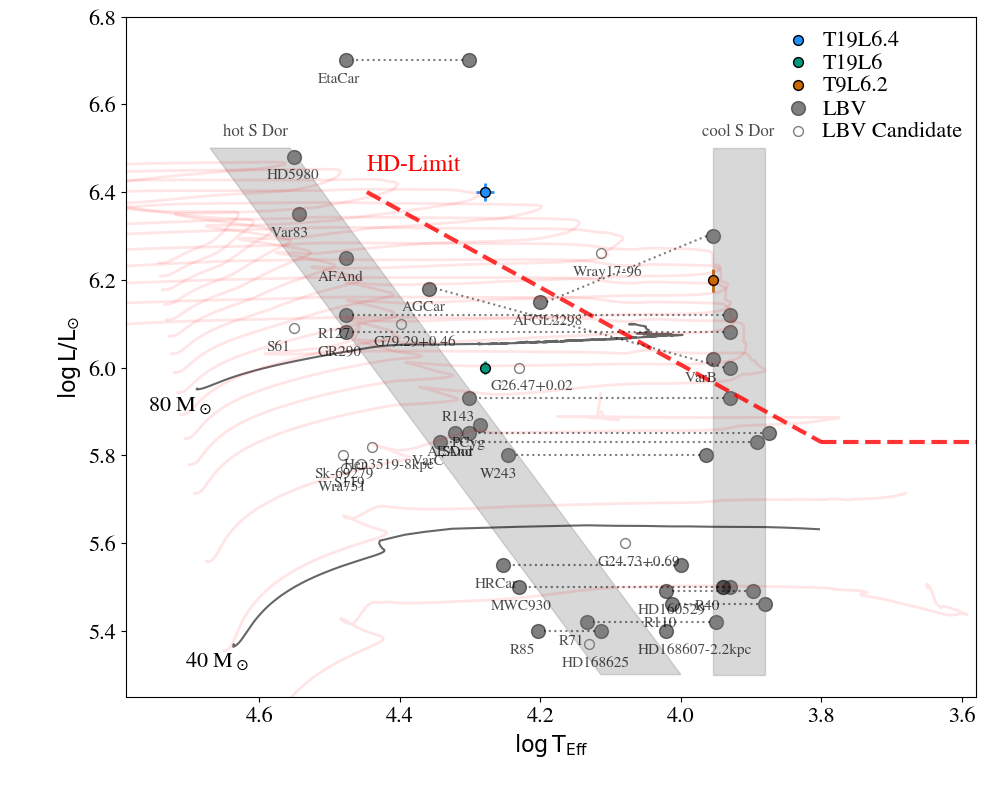

In [20]:
size = 100
size_lbv = 100
size_lbvc = 50

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])

plt.ylim([5.25,6.8])
plt.xlim([4.79,3.58])


# HD LIMIT 

hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='RED' # 'palevioletred'

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=2)

ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=1.0)

hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=1)

# M80T19L6.4
# M35T19L6
# M80T9L6.2

# Models
LBV1=r'T19L6.4'
LBV2=r'T19L6'
LBV3=r'T9L6.2'

plt.scatter(LBVhot[0],LBVhot[1],color=DodgerBlue1,s=size-50,marker='o',label=LBV1,zorder=2,edgecolors='BLACK')
plt.scatter(LBVhotl[0],LBVhotl[1],color=BLUE_GREEN,s=size-50,marker='o',label=LBV2,zorder=2,edgecolors='BLACK')
plt.scatter(LBVcool[0],LBVcool[1],color=VERMILLION,s=size-50,marker='o',label=LBV3,zorder=2,edgecolors='BLACK')


# ADDING STANDARD DEVIATION OF L AND TEFF FROM THE ATHENA CALCULATIONS

MODEL = ['M80T9L6.2','M80T19L6.4','M35T19L6']
DELTAL = [0.12,0.0597,0.0704]  # In % (Standard deviation. CHECK HOW TO TRANSLATE THIS TO XERR - YERR!!)
DELTAT = [0.0175,0.0272,0.0183] 

DELTAL = [0.12*10**LBVcool[1],0.0597*10**LBVhot[1],0.0704*10**LBVhotl[1]]  # In abs values of T and L
DELTAT = [0.0175*10**LBVcool[0],0.0272*10**LBVhot[0],0.0183*10**LBVhotl[0]] 

# M80T9L6.2
T_err=logerr(10**LBVcool[0],DELTAT[0])
L_err=logerr(10**LBVcool[1],DELTAL[0])
print(L_err)
plt.errorbar(LBVcool[0],LBVcool[1],xerr=T_err,yerr=L_err,color=VERMILLION,zorder=1,linewidth=2)

# M80T19L6.4
T_err=logerr(10**LBVcool[0],DELTAT[1])
L_err=logerr(10**LBVcool[1],DELTAL[1])
print(L_err)
plt.errorbar(LBVhot[0],LBVhot[1],xerr=T_err,yerr=L_err,color=DodgerBlue1,zorder=1,linewidth=2)

# M35T19L6
T_err=logerr(10**LBVhotl[0],DELTAT[2])
L_err=logerr(10**LBVhotl[1],DELTAL[2])
print(L_err)
plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=T_err,yerr=L_err,color=BLUE_GREEN,zorder=1,linewidth=2)


#print(10**LBVcool[0],DELTAT[0],10**LBVcool[1],DELTAL[0])
#print(T_err,L_err)

#plt.errorbar(LBVhot[0],LBVhot[1],xerr=0.5*LBVhot[0]*DELTAT[1],yerr=0.5*LBVhot[1]*DELTAL[1],color=DodgerBlue1,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=0.5*LBVhotl[0]*DELTAT[2],yerr=0.5*LBVhotl[1]*DELTAL[2],color=BLUE_GREEN,zorder=1,linewidth=2,capsize=5)

#plt.errorbar(LBVcool[0],LBVcool[1],xerr=[[0.1],[0.2]],color=VERMILLION,zorder=1,linewidth=2,capsize=5)


#plt.errorbar(LBVhot[0],LBVhot[1],xerr=np.log10(0.5*((10**LBVhot[0])*DELTAT[1])),yerr=np.log10(0.5*((10**LBVhot[1])*DELTAL[1])),color=DodgerBlue1,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=np.log10(0.5*((10**LBVhotl[0])*DELTAT[2])),yerr=np.log10(0.5*((10**LBVhotl[1])*DELTAL[2])),color=BLUE_GREEN,zorder=1,linewidth=2,capsize=5)
#plt.errorbar(LBVcool[0],LBVcool[1],xerr=np.log10(0.5*((10**LBVcool[0])*DELTAT[0])),yerr=np.log10(0.5*((10**LBVcool[1])*DELTAL[0])),color=VERMILLION,zorder=1,linewidth=2,capsize=5)

#print(0.5*LBVhot[0]*DELTAT[1])

#TT=10**LBVhot[0]
#dt=(10**LBVhot[0])*DELTAT[1]/2.0
#logdt=np.log10(TT+dt/TT)
#logTTplusdt=np.log10(TT+dt)
#print(TT,dt,logTTplusdt,logdt,logTTplusdt-LBVhot[0])

#A=(10**LBVhot[0])*DELTAT[1]
#print(10**LBVhot[0]+A/2)
#print(np.log10(10**LBVhot[0]+A/2)-LBVhot[0])
#print(0.5*LBVhot[0]*DELTAT[1])



# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('hot S Dor',xy=(np.log10(x[0])+0.05,y[0]+0.03),alpha=0.7,size=12)
x = [8500,8500]
y = [6.5,5.2]
ax.annotate('cool S Dor',xy=(np.log10(x[0])+0.04,y[0]+0.03),alpha=0.7,size=12)



# ADDING STELLAR EVOLUTIONARY TRACKS FROM JIANG ET AL. 2015

zamsL=[]
zamsT=[]

mods=['40deep','80top']
labels=['40','80']
for models in mods:
    chosen_model='./'+models+'/'
    h = mr.MesaData(chosen_model+'history.data')
    model = h.model_number
    logl=h.log_L
    logt=h.log_Teff
    zams=find_zams(logl,loglh,model)
    n=len(logt)
    plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3],linewidth=1.5,linestyle='-',color=BLACK,alpha=0.6,zorder=1)#,label='StarTop')   # HRD
    #plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3], c=cm.coolwarm(hr[6:-3]/np.max(hr[6:-3])))
    zamsL.append(logl[zams])
    zamsT.append(logt[zams])
    
ii=0
for models in labels:
    ax.annotate(models+' M$_\odot$',xy=(zamsT[ii]+0.07,zamsL[ii]-0.05))
    ii=ii+1
    
#plt.scatter(np.log10(StarTopT),np.log10(StarTopL),color=SKY_BLUE,s=150,marker='s',label='StarTop',zorder=3,edgecolor='BLACK')
#plt.scatter(np.log10(StarMidT),np.log10(StarMidL),color=BLUE_GREEN,s=150,marker='s',label='StarMid',zorder=3,edgecolor='BLACK')
#plt.scatter(np.log10(StarDeepT),np.log10(StarDeepL),color=ORANGE,s=150,marker='s',label='StarDeep',zorder=3,edgecolor='BLACK')#,alpha=0.1)



mods=['40','60','80','100']
labels=['40','60','80','100']
rsun=6.67e10
ii=0

#for models in mods:
#    chosen_model=models+'/LOGS/'
#    h = mr.MesaData(chosen_model+'history.data')
#    model = h.model_number
#    logl=h.log_L
#    logt=h.log_Teff
#    hr=h.hp_div_R_Fe*rsun
#    zams=find_zams(logl,loglh,model)
#    print(hr[6:-3]/np.max(hr[6:-3]))
#    plt.scatter(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3],c=cm.coolwarm(hr[6:-3]/np.max(hr[6:-3])))#,linewidth=2.5)
    #plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3], c=cm.coolwarm(hr[6:-3]/np.max(hr[6:-3])))
   
# ADDING MIST STELLAR EVOLUTIONARY TRACKS 
MIST='/Users/mcantiello/astro/'
#MMIST=['03000','04000','05000','06000','06500','07000','07500','08000','08500','09000','09500','10000','10500','11000','11500','12000']
#MMIST=['04000','06000','07000','08000','09000','10000','11000','12000']
MMIST=['06000','08000','10000','12000']

MIST='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/'
MMIST=['03000','04000','05000','06000','06500','07000','07500','08000','08500','09000','09500','10000','10500','11000','11500','12000']


for mods in MMIST:
    eep = read_mist_models.EEP(MIST+mods+'M.track.eep')
    tms=eep.eeps['phase']>=0
    lms=eep.eeps['phase']>=0
    logTeffMS = eep.eeps[tms]['log_Teff']
    logLMS = eep.eeps[lms]['log_L']
    plt.plot(logTeffMS,logLMS,color='RED',linewidth=2,alpha=0.1)

# ADD DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     ('AGCar',[22800,8500],[6.18,6.0]),
     ('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
     ('HRCar',[17900,10000],[5.55,5.55]),
     ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]),
     ('HD160529',[10500,7900],[5.49,5.49]),
     ('VarC',[22000,7800],[5.83,5.83]),
     ('R127',[30000,8500],[6.12,6.12]),
     ('SDor',[20000,7500],[5.85,5.85]),
     ('R71',[13600,8900],[5.42,5.42]),
     ('R110',[10300,7600],[5.46,5.46]),
     ('R143',[20000,8500],[5.93,5.93]),
     ('R40',[8700,8700],[5.5,5.5]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('GR290',[30000,8500],[6.08,6.08]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('AFGL2298',[15850,9000],[6.15,6.3]))

LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('PCyg',19300,5.87),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('VarB',9000,6.02),
      ('HD5980',35500,6.48)) 

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))

#  LBV New Distances
#('HD168607-1.2kpc',10500,5.4-0.52),
#('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
#('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67])

# LBVC New Distances



deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
for i in range(0, len(LBV2)): 
    plt.scatter(np.log10(LBV2[i][1]),LBV2[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV2[i][0],xy=(np.log10(LBV2[i][1])+deltax,LBV2[i][2]-deltay),alpha=0.7,size=11)
    
for i in range(0, len(LBVC)): 
    if i==0:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5,label='LBV Candidate')
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
    else:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5)
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")


label=plt.legend(loc=1,fontsize=16,scatterpoints=1)


############ GENEVA MODELS ######################


GENEVA='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/ekstrom/Z14/'
MODS=['M040Z14V0.dat','M050Z14V0.dat','M060Z14V0.dat','M085Z14V0.dat','M120Z14V0.dat','M150Z14V0.dat','M200Z14V0.dat']

# Reading the models. Names is basically the header content
    
names=['line','time','mass','lgL','lgT','1H_surf','4He_surf','12C_surf','13C_surf','14N_surf','16O_surf','17O_surf','18O_surf','20Ne_surf','22Ne_surf','26Al_surf','Mcc/Mt','lg(Teff)','lg(Md)','lg(rhoc)','lg(Tc)','1H_cen','4He_cen','12C_cen','13C_cen','14N_cen','16O_cen','17O_cen','18O_cen','20Ne_cen','22Ne_cen','26Al_cen','Omeg_surf','Omeg_cen','Rp/Req','Md/Md(0)','v_crit1','v_crit2','v_equa','Om/Om_cr','Gamma_Ed','lg(Mdot_mech)','L_tot']    

for MODEL in MODS:
    eeps = np.genfromtxt(GENEVA+MODEL,skip_header=2,names=names)
    lgL = eeps['lgL']
    lgT = eeps['lgT']
    model = eeps['line']
    h1 = eeps['1H_cen']
    end_ms = find_h1(h1,model,0.01)
    #ax.plot(lgT[:end_ms],lgL[:end_ms],color='BLUE',linewidth=2,alpha=0.4)
    #plt.plot(lgT[end_ms:],lgL[end_ms:],color='BLUE',linewidth=2,alpha=0.1)


############ BROTT MODELS ######################

BROTT='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/brott/'
MODS=['J_A+A_530_A115_evol_f35-0.mw.track.dat.txt','J_A+A_530_A115_evol_f50-0.mw.track.dat.txt','f30-0.mw.track.dat.txt','J_A+A_530_A115_evol_f40-0.mw.track.dat.txt','J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']
#MODS=['J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']

NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(BROTT+MODEL,skip_header=5,skip_footer=1,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,0.01)
   # plt.plot(lgT[:end_ms],lgL[:end_ms],color='GREEN',linewidth=2,alpha=0.4)
   # plt.plot(lgT[end_ms:],lgL[end_ms:],color='GREEN',linewidth=2,alpha=0.1)
    
    
#FILENAME = "LBV_plot.pdf"
#plt.savefig(FILENAME)


[[0.026872146400301312], [0.025305865264770262]]
[[0.021047965680136869], [0.020074861263740303]]
[[0.015562705203923914], [0.015024263324625123]]
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/04000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/06000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/08500M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/12000M.track.eep


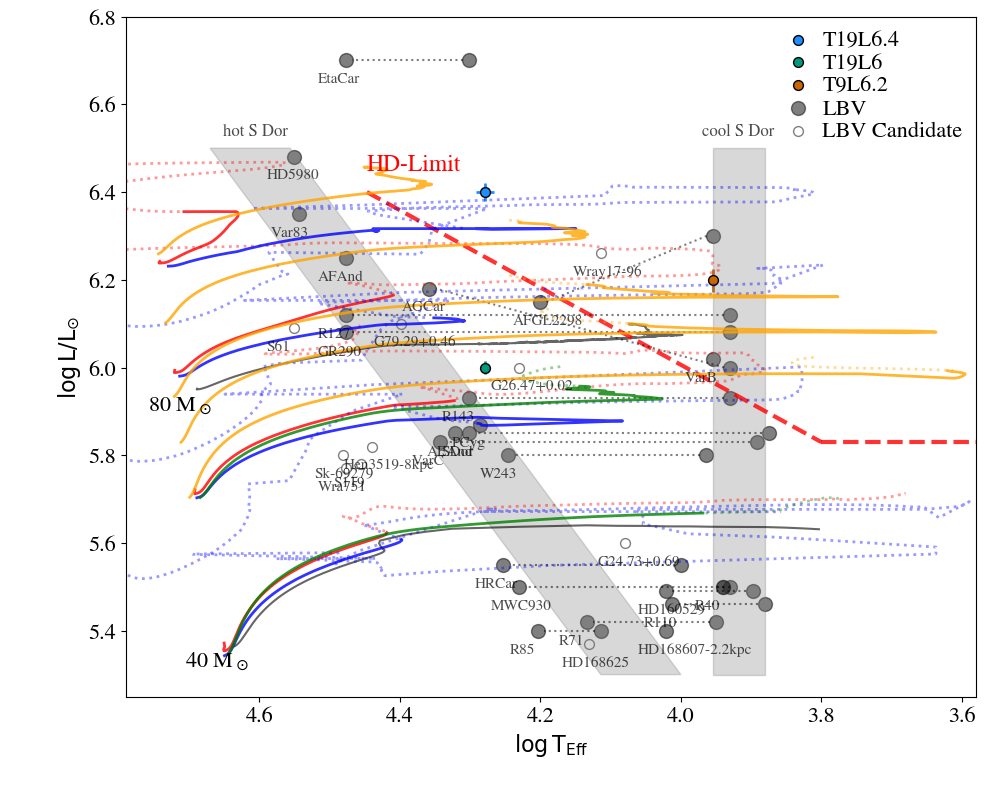

In [28]:
size = 100
size_lbv = 100
size_lbvc = 50

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])

plt.ylim([5.25,6.8])
plt.xlim([4.79,3.58])


# HD LIMIT 

hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='RED' # 'palevioletred'

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=2)

ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=1.0)

hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=1)

# M80T19L6.4
# M35T19L6
# M80T9L6.2

# Models
LBV1=r'T19L6.4'
LBV2=r'T19L6'
LBV3=r'T9L6.2'

plt.scatter(LBVhot[0],LBVhot[1],color=DodgerBlue1,s=size-50,marker='o',label=LBV1,zorder=2,edgecolors='BLACK')
plt.scatter(LBVhotl[0],LBVhotl[1],color=BLUE_GREEN,s=size-50,marker='o',label=LBV2,zorder=2,edgecolors='BLACK')
plt.scatter(LBVcool[0],LBVcool[1],color=VERMILLION,s=size-50,marker='o',label=LBV3,zorder=2,edgecolors='BLACK')


# ADDING STANDARD DEVIATION OF L AND TEFF FROM THE ATHENA CALCULATIONS

MODEL = ['M80T9L6.2','M80T19L6.4','M35T19L6']
DELTAL = [0.12,0.0597,0.0704]  # In % (Standard deviation. CHECK HOW TO TRANSLATE THIS TO XERR - YERR!!)
DELTAT = [0.0175,0.0272,0.0183] 

DELTAL = [0.12*10**LBVcool[1],0.0597*10**LBVhot[1],0.0704*10**LBVhotl[1]]  # In abs values of T and L
DELTAT = [0.0175*10**LBVcool[0],0.0272*10**LBVhot[0],0.0183*10**LBVhotl[0]] 

# M80T9L6.2
T_err=logerr(10**LBVcool[0],DELTAT[0])
L_err=logerr(10**LBVcool[1],DELTAL[0])
print(L_err)
plt.errorbar(LBVcool[0],LBVcool[1],xerr=T_err,yerr=L_err,color=VERMILLION,zorder=1,linewidth=2)

# M80T19L6.4
T_err=logerr(10**LBVcool[0],DELTAT[1])
L_err=logerr(10**LBVcool[1],DELTAL[1])
print(L_err)
plt.errorbar(LBVhot[0],LBVhot[1],xerr=T_err,yerr=L_err,color=DodgerBlue1,zorder=1,linewidth=2)

# M35T19L6
T_err=logerr(10**LBVhotl[0],DELTAT[2])
L_err=logerr(10**LBVhotl[1],DELTAL[2])
print(L_err)
plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=T_err,yerr=L_err,color=BLUE_GREEN,zorder=1,linewidth=2)



# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('hot S Dor',xy=(np.log10(x[0])+0.05,y[0]+0.03),alpha=0.7,size=12)
x = [8500,8500]
y = [6.5,5.2]
ax.annotate('cool S Dor',xy=(np.log10(x[0])+0.04,y[0]+0.03),alpha=0.7,size=12)


# ADDING STELLAR EVOLUTIONARY TRACKS FROM JIANG ET AL. 2015

zamsL=[]
zamsT=[]

mods=['40deep','80top']
labels=['40','80']
for models in mods:
    chosen_model='./'+models+'/'
    h = mr.MesaData(chosen_model+'history.data')
    model = h.model_number
    logl=h.log_L
    logt=h.log_Teff
    zams=find_zams(logl,loglh,model)
    n=len(logt)
    plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3],linewidth=1.5,linestyle='-',color=BLACK,alpha=0.6,zorder=1)#,label='StarTop')   # HRD
    #plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3], c=cm.coolwarm(hr[6:-3]/np.max(hr[6:-3])))
    zamsL.append(logl[zams])
    zamsT.append(logt[zams])
    
ii=0
for models in labels:
    ax.annotate(models+' M$_\odot$',xy=(zamsT[ii]+0.07,zamsL[ii]-0.05))
    ii=ii+1
 

mods=['40','60','80','100']
labels=['40','60','80','100']
rsun=6.67e10
ii=0


# ADD DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     ('AGCar',[22800,8500],[6.18,6.0]),
     ('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
     ('HRCar',[17900,10000],[5.55,5.55]),
     ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]),
     ('HD160529',[10500,7900],[5.49,5.49]),
     ('VarC',[22000,7800],[5.83,5.83]),
     ('R127',[30000,8500],[6.12,6.12]),
     ('SDor',[20000,7500],[5.85,5.85]),
     ('R71',[13600,8900],[5.42,5.42]),
     ('R110',[10300,7600],[5.46,5.46]),
     ('R143',[20000,8500],[5.93,5.93]),
     ('R40',[8700,8700],[5.5,5.5]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('GR290',[30000,8500],[6.08,6.08]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('AFGL2298',[15850,9000],[6.15,6.3]))

LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('PCyg',19300,5.87),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('VarB',9000,6.02),
      ('HD5980',35500,6.48)) 

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))

#  LBV New Distances
#('HD168607-1.2kpc',10500,5.4-0.52),
#('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
#('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67])

# LBVC New Distances

deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
for i in range(0, len(LBV2)): 
    plt.scatter(np.log10(LBV2[i][1]),LBV2[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV2[i][0],xy=(np.log10(LBV2[i][1])+deltax,LBV2[i][2]-deltay),alpha=0.7,size=11)
    
for i in range(0, len(LBVC)): 
    if i==0:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5,label='LBV Candidate')
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
    else:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5)
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")


label=plt.legend(loc=1,fontsize=16,scatterpoints=1)

###################### ADDING MIST STELLAR EVOLUTIONARY TRACKS ############################

MIST='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/'
MMIST=['04000','06000','08500','12000']


for mods in MMIST:
    eep = read_mist_models.EEP(MIST+mods+'M.track.eep')
    tms=eep.eeps['phase']>=0
    lms=eep.eeps['phase']>=0
    logTeffMS = eep.eeps[tms]['log_Teff']
    logLMS = eep.eeps[lms]['log_L']
    logTeff = eep.eeps['log_Teff']
    logL = eep.eeps['log_L']
    h1 = eep.eeps['center_h1']
    logLH = eep.eeps['log_LH']
    model = np.arange(1,len(h1))
    zams= find_zams(logL,logLH,model)
    end_ms = find_h1(h1,model,0.01)
    plt.plot(logTeff[zams:end_ms],logL[zams:end_ms],color='RED',linewidth=2,alpha=0.8)
    plt.plot(logTeff[end_ms:],logL[end_ms:],color='RED',linewidth=2,alpha=0.4,linestyle=':')

############ ADDING GENEVA MODELS ######################


GENEVA='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/ekstrom/Z14/'
#MODS=['M040Z14V0.dat','M050Z14V0.dat','M060Z14V0.dat','M085Z14V0.dat','M120Z14V0.dat','M150Z14V0.dat','M200Z14V0.dat']
MODS=['M040Z14V0.dat','M060Z14V0.dat','M085Z14V0.dat','M120Z14V0.dat']


# Reading the models. Names is basically the header content
    
names=['line','time','mass','lgL','lgT','1H_surf','4He_surf','12C_surf','13C_surf','14N_surf','16O_surf','17O_surf','18O_surf','20Ne_surf','22Ne_surf','26Al_surf','Mcc/Mt','lg(Teff)','lg(Md)','lg(rhoc)','lg(Tc)','1H_cen','4He_cen','12C_cen','13C_cen','14N_cen','16O_cen','17O_cen','18O_cen','20Ne_cen','22Ne_cen','26Al_cen','Omeg_surf','Omeg_cen','Rp/Req','Md/Md(0)','v_crit1','v_crit2','v_equa','Om/Om_cr','Gamma_Ed','lg(Mdot_mech)','L_tot']    

for MODEL in MODS:
    eeps = np.genfromtxt(GENEVA+MODEL,skip_header=2,names=names)
    lgL = eeps['lgL']
    lgT = eeps['lgT']
    model = eeps['line']
    h1 = eeps['1H_cen']
    end_ms = find_h1(h1,model,0.01)
    ax.plot(lgT[:end_ms],lgL[:end_ms],color='BLUE',linewidth=2,alpha=0.8)
    plt.plot(lgT[end_ms:],lgL[end_ms:],color='BLUE',linewidth=2,alpha=0.4,linestyle=':')


############ ADDING BROTT MODELS ######################

BROTT='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/brott/'
MODS=['J_A+A_530_A115_evol_f40-0.mw.track.dat.txt','J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']
#MODS=['J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']

NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(BROTT+MODEL,skip_header=5,skip_footer=1,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,0.01)
    plt.plot(lgT[:end_ms],lgL[:end_ms],color='GREEN',linewidth=2,alpha=0.8)
    plt.plot(lgT[end_ms:],lgL[end_ms:],color='GREEN',linewidth=2,alpha=0.4,linestyle=':')
    
############ ADDING KOHLER MODELS ######################
        
KOHLER='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/Kohler/tracks/'
MODS=['f60-0.lmc.track.dat','f70-0.lmc.track.dat','f80-0.lmc.track.dat','f100-0.lmc.track.dat','f125-0.lmc.track.dat']
NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(KOHLER+MODEL,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,0.01)
    plt.plot(lgT[:end_ms],lgL[:end_ms],color='ORANGE',linewidth=2,alpha=0.8)
    plt.plot(lgT[end_ms:],lgL[end_ms:],color='ORANGE',linewidth=2,alpha=0.4,linestyle=':')
        
    
#FILENAME = "LBV_plot.pdf"
#plt.savefig(FILENAME)


In [51]:
from scipy.signal import savgol_filter

[[0.026872146400301312], [0.025305865264770262]]
[[0.021047965680136869], [0.020074861263740303]]
[[0.015562705203923914], [0.015024263324625123]]
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/06000M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/08500M.track.eep
Reading in: /Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/12000M.track.eep


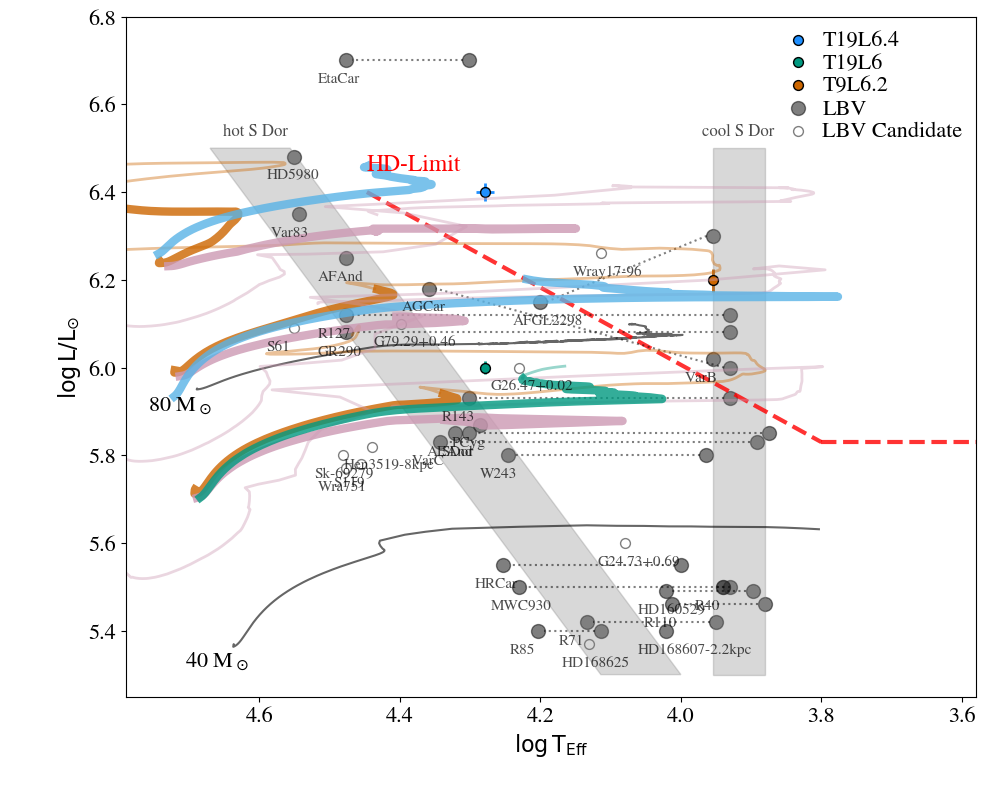

In [58]:
size = 100
size_lbv = 100
size_lbvc = 50

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])

plt.ylim([5.25,6.8])
plt.xlim([4.79,3.58])


# HD LIMIT 

hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='RED' # 'palevioletred'

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=2)

ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=1.0)

hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]

plt.plot(hdx, hdy, '--',linewidth=3,color=clr,alpha=0.8,zorder=1)

# M80T19L6.4
# M35T19L6
# M80T9L6.2

# Models
LBV1=r'T19L6.4'
LBV2=r'T19L6'
LBV3=r'T9L6.2'

plt.scatter(LBVhot[0],LBVhot[1],color=DodgerBlue1,s=size-50,marker='o',label=LBV1,zorder=2,edgecolors='BLACK')
plt.scatter(LBVhotl[0],LBVhotl[1],color=BLUE_GREEN,s=size-50,marker='o',label=LBV2,zorder=2,edgecolors='BLACK')
plt.scatter(LBVcool[0],LBVcool[1],color=VERMILLION,s=size-50,marker='o',label=LBV3,zorder=2,edgecolors='BLACK')


# ADDING STANDARD DEVIATION OF L AND TEFF FROM THE ATHENA CALCULATIONS

MODEL = ['M80T9L6.2','M80T19L6.4','M35T19L6']
DELTAL = [0.12,0.0597,0.0704]  # In % (Standard deviation. CHECK HOW TO TRANSLATE THIS TO XERR - YERR!!)
DELTAT = [0.0175,0.0272,0.0183] 

DELTAL = [0.12*10**LBVcool[1],0.0597*10**LBVhot[1],0.0704*10**LBVhotl[1]]  # In abs values of T and L
DELTAT = [0.0175*10**LBVcool[0],0.0272*10**LBVhot[0],0.0183*10**LBVhotl[0]] 

# M80T9L6.2
T_err=logerr(10**LBVcool[0],DELTAT[0])
L_err=logerr(10**LBVcool[1],DELTAL[0])
print(L_err)
plt.errorbar(LBVcool[0],LBVcool[1],xerr=T_err,yerr=L_err,color=VERMILLION,zorder=1,linewidth=2)

# M80T19L6.4
T_err=logerr(10**LBVcool[0],DELTAT[1])
L_err=logerr(10**LBVcool[1],DELTAL[1])
print(L_err)
plt.errorbar(LBVhot[0],LBVhot[1],xerr=T_err,yerr=L_err,color=DodgerBlue1,zorder=1,linewidth=2)

# M35T19L6
T_err=logerr(10**LBVhotl[0],DELTAT[2])
L_err=logerr(10**LBVhotl[1],DELTAL[2])
print(L_err)
plt.errorbar(LBVhotl[0],LBVhotl[1],xerr=T_err,yerr=L_err,color=BLUE_GREEN,zorder=1,linewidth=2)



# Fill LBV instability strips

# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('hot S Dor',xy=(np.log10(x[0])+0.05,y[0]+0.03),alpha=0.7,size=12)
x = [8500,8500]
y = [6.5,5.2]
ax.annotate('cool S Dor',xy=(np.log10(x[0])+0.04,y[0]+0.03),alpha=0.7,size=12)


# ADDING STELLAR EVOLUTIONARY TRACKS FROM JIANG ET AL. 2015

zamsL=[]
zamsT=[]

mods=['40deep','80top']
labels=['40','80']
for models in mods:
    chosen_model='./'+models+'/'
    h = mr.MesaData(chosen_model+'history.data')
    model = h.model_number
    logl=h.log_L
    logt=h.log_Teff
    zams=find_zams(logl,loglh,model)
    n=len(logt)
    plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3],linewidth=1.5,linestyle='-',color=BLACK,alpha=0.6,zorder=1)#,label='StarTop')   # HRD
    #plt.plot(smooth(logt,7)[6:-3],smooth(logl,7)[6:-3], c=cm.coolwarm(hr[6:-3]/np.max(hr[6:-3])))
    zamsL.append(logl[zams])
    zamsT.append(logt[zams])
    
ii=0
for models in labels:
    ax.annotate(models+' M$_\odot$',xy=(zamsT[ii]+0.07,zamsL[ii]-0.05))
    ii=ii+1
 

mods=['40','60','80','100']
labels=['40','60','80','100']
rsun=6.67e10
ii=0


# ADD DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     ('AGCar',[22800,8500],[6.18,6.0]),
     ('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
     ('HRCar',[17900,10000],[5.55,5.55]),
     ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]),
     ('HD160529',[10500,7900],[5.49,5.49]),
     ('VarC',[22000,7800],[5.83,5.83]),
     ('R127',[30000,8500],[6.12,6.12]),
     ('SDor',[20000,7500],[5.85,5.85]),
     ('R71',[13600,8900],[5.42,5.42]),
     ('R110',[10300,7600],[5.46,5.46]),
     ('R143',[20000,8500],[5.93,5.93]),
     ('R40',[8700,8700],[5.5,5.5]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('GR290',[30000,8500],[6.08,6.08]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('AFGL2298',[15850,9000],[6.15,6.3]))

LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('PCyg',19300,5.87),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('VarB',9000,6.02),
      ('HD5980',35500,6.48)) 

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))

#  LBV New Distances
#('HD168607-1.2kpc',10500,5.4-0.52),
#('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]),
#('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67])

# LBVC New Distances

deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
for i in range(0, len(LBV2)): 
    plt.scatter(np.log10(LBV2[i][1]),LBV2[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV2[i][0],xy=(np.log10(LBV2[i][1])+deltax,LBV2[i][2]-deltay),alpha=0.7,size=11)
    
for i in range(0, len(LBVC)): 
    if i==0:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5,label='LBV Candidate')
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
    else:
        plt.scatter(np.log10(LBVC[i][1]),LBVC[i][2],color='WHITE',edgecolors='BLACK',s=size_lbvc,marker='o',alpha=0.5)
        ax.annotate(LBVC[i][0],xy=(np.log10(LBVC[i][1])+deltax,LBVC[i][2]-deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r"$\log \, {\rm T}_{\rm Eff}$")
ax.set_ylabel(r"$\log \, {\rm L}/{\rm L}_{\odot}$")


label1=plt.legend(loc=1,fontsize=16,scatterpoints=1)

###### Set linestyes for tracks
linew=[6,2]
alpha=[0.8,0.4]
linestyle='-'

# Savgol_filter params:
nn=5 # Window Length
pp=2 # Polynom Order
###################### ADDING MIST STELLAR EVOLUTIONARY TRACKS ############################

MIST='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/'
MMIST=['06000','08500','12000']


for mods in MMIST:
    eep = read_mist_models.EEP(MIST+mods+'M.track.eep')
    tms=eep.eeps['phase']>=0
    lms=eep.eeps['phase']>=0
    logTeffMS = eep.eeps[tms]['log_Teff']
    logLMS = eep.eeps[lms]['log_L']
    logTeff = eep.eeps['log_Teff']
    logL = eep.eeps['log_L']
    h1 = eep.eeps['center_h1']
    logLH = eep.eeps['log_LH']
    model = np.arange(1,len(h1))
    zams= find_zams(logL,logLH,model)
    end_ms = find_h1(h1,model,0.0001)
    plt.plot(logTeff[zams:end_ms],logL[zams:end_ms],color=VERMILLION,linewidth=linew[0],alpha=alpha[0])
    plt.plot(savgol_filter(logTeff[end_ms:],nn,pp),savgol_filter(logL[end_ms:],nn,pp),color=VERMILLION,linewidth=linew[1],alpha=alpha[1],linestyle=linestyle)

############ ADDING GENEVA MODELS ######################


GENEVA='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/ekstrom/Z14/'
#MODS=['M040Z14V0.dat','M050Z14V0.dat','M060Z14V0.dat','M085Z14V0.dat','M120Z14V0.dat','M150Z14V0.dat','M200Z14V0.dat']
MODS=['M060Z14V0.dat','M085Z14V0.dat','M120Z14V0.dat']


# Reading the models. Names is basically the header content
    
names=['line','time','mass','lgL','lgT','1H_surf','4He_surf','12C_surf','13C_surf','14N_surf','16O_surf','17O_surf','18O_surf','20Ne_surf','22Ne_surf','26Al_surf','Mcc/Mt','lg(Teff)','lg(Md)','lg(rhoc)','lg(Tc)','1H_cen','4He_cen','12C_cen','13C_cen','14N_cen','16O_cen','17O_cen','18O_cen','20Ne_cen','22Ne_cen','26Al_cen','Omeg_surf','Omeg_cen','Rp/Req','Md/Md(0)','v_crit1','v_crit2','v_equa','Om/Om_cr','Gamma_Ed','lg(Mdot_mech)','L_tot']    

for MODEL in MODS:
    eeps = np.genfromtxt(GENEVA+MODEL,skip_header=2,names=names)
    lgL = eeps['lgL']
    lgT = eeps['lgT']
    model = eeps['line']
    h1 = eeps['1H_cen']
    end_ms = find_h1(h1,model,0.0001)
    ax.plot(lgT[:end_ms],lgL[:end_ms],color=RED_PURPLE,linewidth=linew[0],alpha=alpha[0])
    plt.plot(savgol_filter(lgT[end_ms:],nn,pp),savgol_filter(lgL[end_ms:],nn,pp),color=RED_PURPLE,linewidth=linew[1],alpha=alpha[1],linestyle=linestyle)
 

############ ADDING BROTT MODELS ######################

BROTT='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/brott/'
MODS=['J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']
#MODS=['J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']

NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(BROTT+MODEL,skip_header=5,skip_footer=1,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,0.0001)
    plt.plot(lgT[:end_ms],lgL[:end_ms],color=BLUE_GREEN,linewidth=linew[0],alpha=alpha[0])
    plt.plot(savgol_filter(lgT[end_ms:],nn,pp),savgol_filter(lgL[end_ms:],nn,pp),color=BLUE_GREEN,linewidth=linew[1],alpha=alpha[1],linestyle=linestyle)
     
############ ADDING KOHLER MODELS ######################
        
KOHLER='/Users/mcantiello/Dropbox (Personal)/work/stevtracks/Kohler/tracks/'
MODS=['f80-0.lmc.track.dat','f125-0.lmc.track.dat']
NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(KOHLER+MODEL,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,0.0001)
    plt.plot(lgT[:end_ms],lgL[:end_ms],color=SKY_BLUE,linewidth=linew[0],alpha=alpha[0])
    #plt.plot(savgol_filter(lgT[end_ms:],nn,pp),savgol_filter(lgL[end_ms:],nn,pp),color=SKY_BLUE,linewidth=linew[1],alpha=alpha[1],linestyle=linestyle)
 


#plot_lines=plot_lines.append([l1, l2, l3, l4])
#label2=plt.legend(["MESA (Choi)", "GENEVA (Ekstrom)", "STERN (Brott)","STERN (Kohler)"],loc=4)

#legend2 = plt.legend(plot_lines[0], ["MESA (Choi)", "GENEVA (Ekstrom)", "STERN (Brott)","STERN (Kohler)"], loc=4)
#label2=plt.legend(linestyle=['-','-','-','-'],["MESA (Choi)", "GENEVA (Ekstrom)", "STERN (Brott)","STERN (Kohler)"],[VERMILLION,RED_PURPLE,BLUE_GREEN,SKY_BLUE])
#label2=plt.legend(['-','-','-','-'],["MESA (Choi)", "GENEVA (Ekstrom)", "STERN (Brott)","STERN (Kohler)"],[VERMILLION,RED_PURPLE,BLUE_GREEN,SKY_BLUE],loc=4)


#FILENAME = "LBV_plot.pdf"
#plt.savefig(FILENAME)
